In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/loan_sanction_test.csv")

In [ ]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
df.shape

(367, 12)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
#Summary Statistics for Categorical Columns
df.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP002989,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [ ]:
#Check for missing values in each column
missing=df.isnull().sum().sort_values(ascending=False)
missing

,0
Credit_History,29
Self_Employed,23
Gender,11
Dependents,10
Loan_Amount_Term,6
LoanAmount,5
Married,0
Loan_ID,0
CoapplicantIncome,0
ApplicantIncome,0


In [ ]:
missing_percent=(df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent

,0
Credit_History,7.901907
Self_Employed,6.267030
Gender,2.997275
Dependents,2.724796
Loan_Amount_Term,1.634877
LoanAmount,1.362398
Married,0.000000
Loan_ID,0.000000
CoapplicantIncome,0.000000
ApplicantIncome,0.000000


In [ ]:
# Combine into one DataFrame for clarity
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing %': missing_percent})
print("\nMissing Value Summary:")
print(missing_df)


Missing Value Summary:
                   Missing Values  Missing %
Credit_History                 29   7.901907
Self_Employed                  23   6.267030
Gender                         11   2.997275
Dependents                     10   2.724796
Loan_Amount_Term                6   1.634877
LoanAmount                      5   1.362398
Married                         0   0.000000
Loan_ID                         0   0.000000
CoapplicantIncome               0   0.000000
ApplicantIncome                 0   0.000000
Education                       0   0.000000
Property_Area                   0   0.000000


In [ ]:
#Separating numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)



Numeric Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


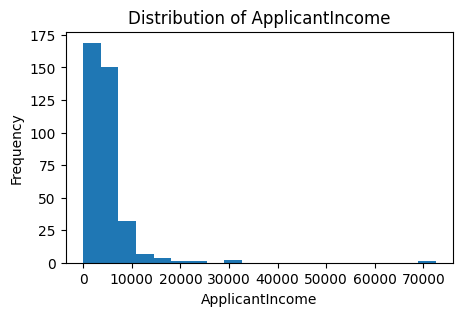

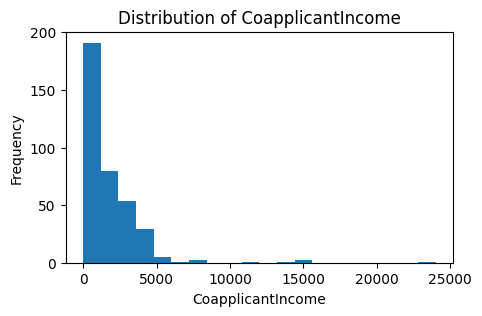

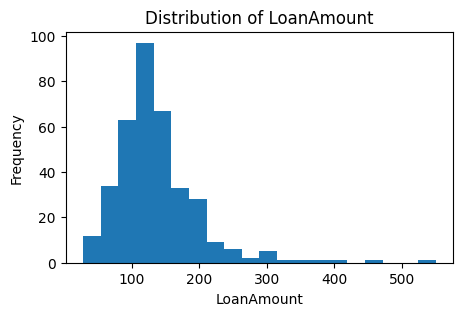

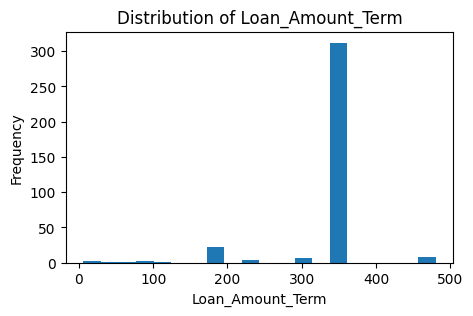

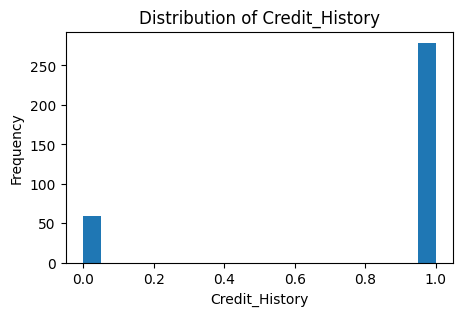

In [ ]:
#Basic Univariate Analysis
#Plot histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


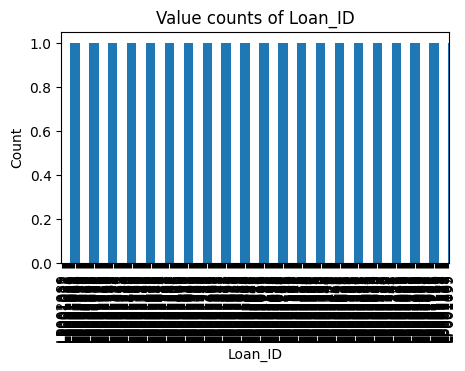

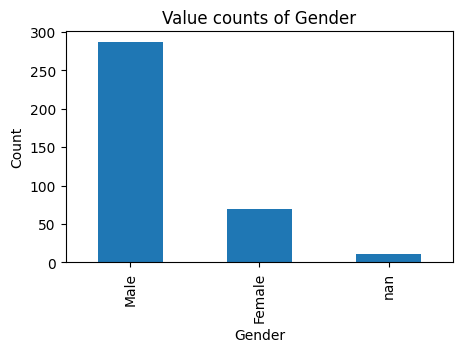

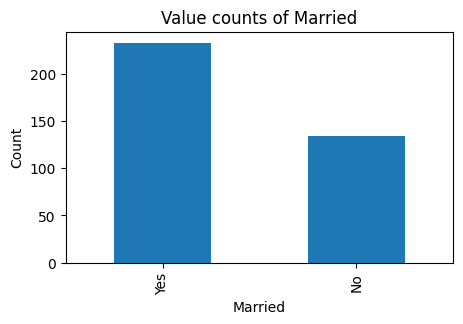

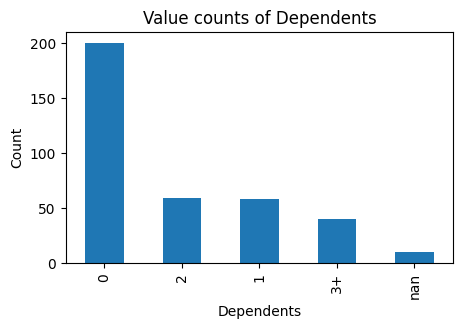

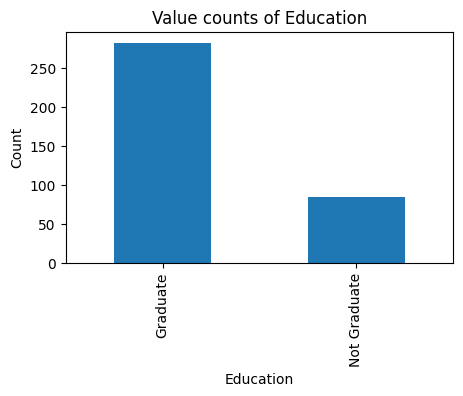

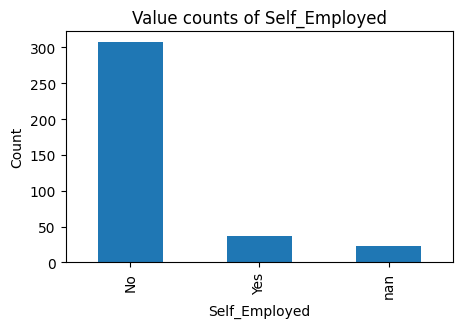

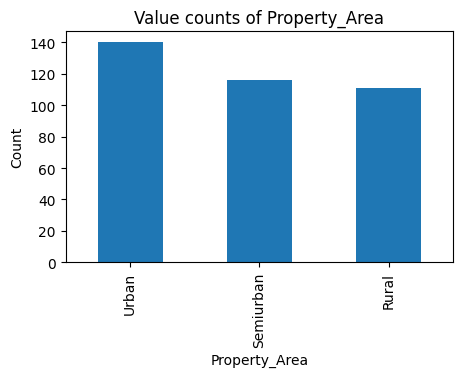

In [ ]:
#Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f"Value counts of {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()


In [ ]:
#DATA CLEANING

In [ ]:
#Creating a copy of the dataset to avoid modifying the original
df_clean = df.copy()


In [ ]:
#Check missing values again
df_clean.isnull().sum()


,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
#Cleaning categorical columns
#For categorical columns like Gender, Married, Dependents, etc., we fill missing values using the most frequent value (mode).
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

/tmp/ipython-input-783898906.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


In [ ]:
#Fixing ‘Dependents’ column
#The column sometimes has '3+'. Let’s replace it with numeric 3 and convert it to an integer.
df_clean['Dependents'] = df_clean['Dependents'].replace('3+', '3')
df_clean['Dependents'] = df_clean['Dependents'].astype(int)

In [ ]:
#Handle missing values in numerical columns
#We will fill missing numeric values using the median, which is more robust against outliers
numeric_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)


/tmp/ipython-input-2957714538.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [ ]:
#Verify that all missing values are handled
#Check again for missing values
print("Missing values after cleaning:\n")
print(df_clean.isnull().sum())


Missing values after cleaning:

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
#Quick sanity check after cleaning
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#Creating Total_Income feature
df_clean['Total_Income'] = df_clean['ApplicantIncome'] + df_clean['CoapplicantIncome']


In [ ]:
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,5243
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393


In [ ]:
#Feature Engineering & Encoding
#Create a copy for feature engineering
df_fe = df_clean.copy()

<Axes: xlabel='LoanAmount', ylabel='Density'>

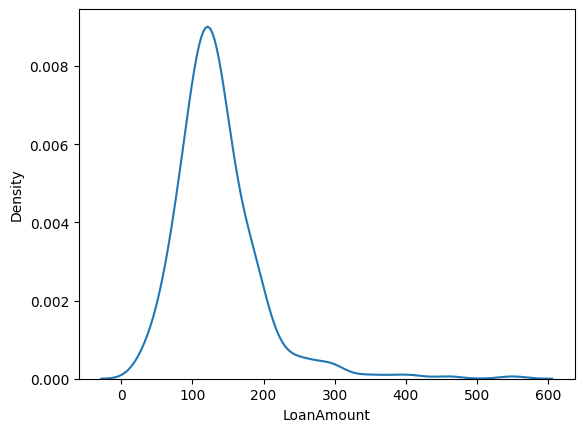

In [ ]:
 sns.kdeplot(df_fe['LoanAmount'])


In [ ]:
#Loan amounts are often right-skewed — meaning most people have small loans, and a few have very large ones.
#To make it more normally distributed, we apply a log transformation.
# Step 6.2: Apply log transformation to LoanAmount
df_fe['LoanAmount_log'] = np.log1p(df_fe['LoanAmount'])  # log(LoanAmount + 1)
#This reduces skewness and helps models (like Logistic Regression) perform better.


In [ ]:
#Create useful new features
df_fe['EMI'] = df_fe['LoanAmount'] / df_fe['Loan_Amount_Term']   # EMI approximation
df_fe['Balance_Income'] = df_fe['Total_Income'] - (df_fe['EMI'] * 1000)  # residual income

In [ ]:
#Encode categorical columns
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
df_encoded = df_fe.copy()
le = LabelEncoder()

# Columns with only 2 unique values (binary)
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode multi-category columns like 'Property_Area'
df_encoded = pd.get_dummies(df_encoded, columns=['Property_Area'], drop_first=True)


In [ ]:
#Drop Loan_ID (not useful for prediction)
df_encoded.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
# Verify final dataset
print("Final dataset shape:", df_encoded.shape)
print("\nColumns:\n", df_encoded.columns.tolist())

# View top rows
df_encoded.head()


Final dataset shape: (367, 16)

Columns:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'LoanAmount_log', 'EMI', 'Balance_Income', 'Property_Area_Semiurban', 'Property_Area_Urban']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,EMI,Balance_Income,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,5720,4.709530,0.305556,5414.444444,False,True
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,4576,4.844187,0.350000,4226.000000,False,True
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,6800,5.342334,0.577778,6222.222222,False,True
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,4886,4.615121,0.277778,4608.222222,False,True
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,3276,4.369448,0.216667,3059.333333,False,True


***Exploratory Data Analysis (EDA)***

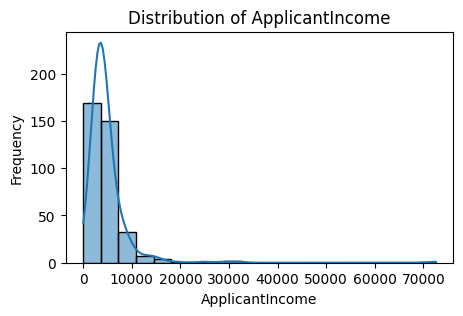

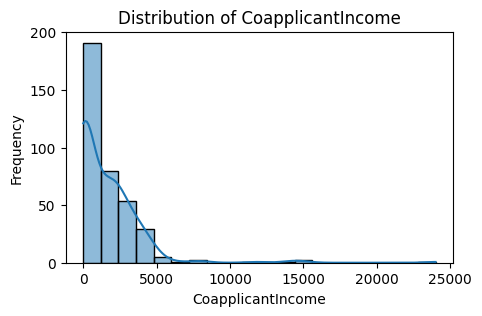

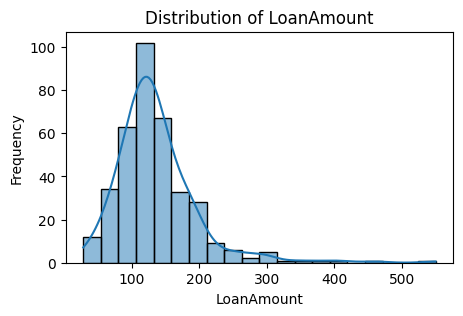

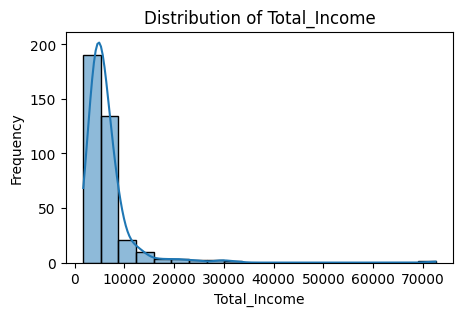

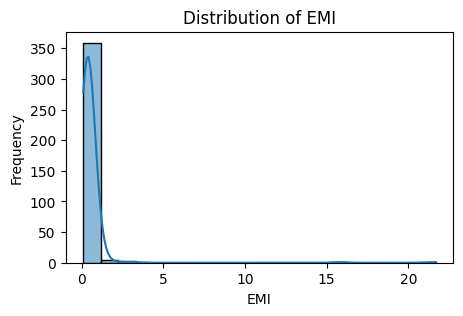

In [ ]:
#Visualize distribution of key numeric features
#Distribution plots for numeric columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income', 'EMI']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df_encoded[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


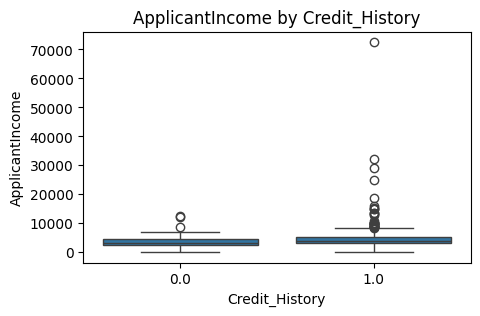

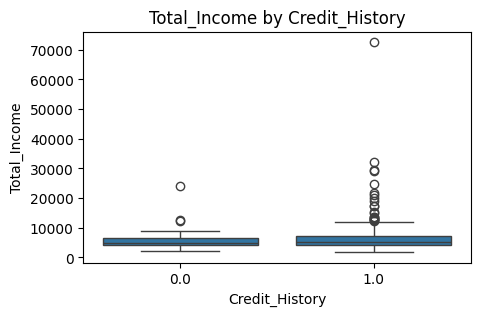

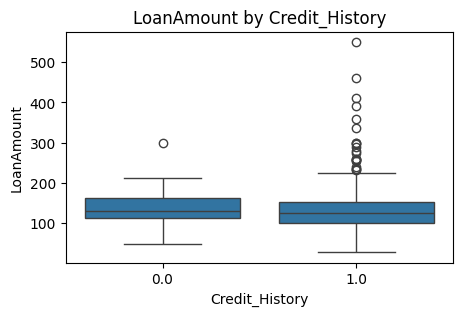

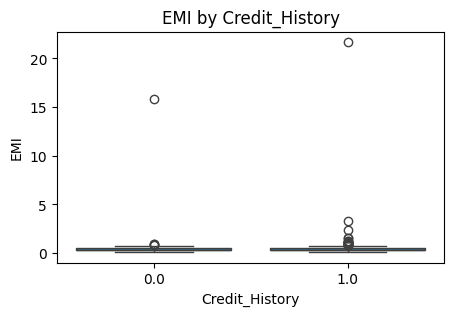

In [ ]:
#Compare numerical features against Credit_History
#Boxplots - income and loan features vs credit history
cols_to_compare = ['ApplicantIncome', 'Total_Income', 'LoanAmount', 'EMI']

for col in cols_to_compare:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Credit_History', y=col, data=df_encoded)
    plt.title(f"{col} by Credit_History")
    plt.show()


Insight:
Applicants with good credit history (1.0) typically have more consistent income/loan behavior.


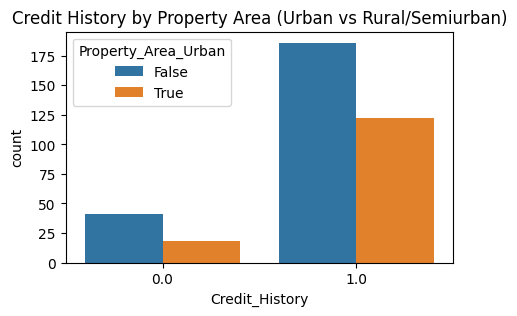

In [ ]:
#Relationship between Property_Area and Credit_History
#Count plot - Property Area vs Credit History
plt.figure(figsize=(5,3))
sns.countplot(x='Credit_History', hue='Property_Area_Urban', data=df_encoded)
plt.title("Credit History by Property Area (Urban vs Rural/Semiurban)")
plt.show()


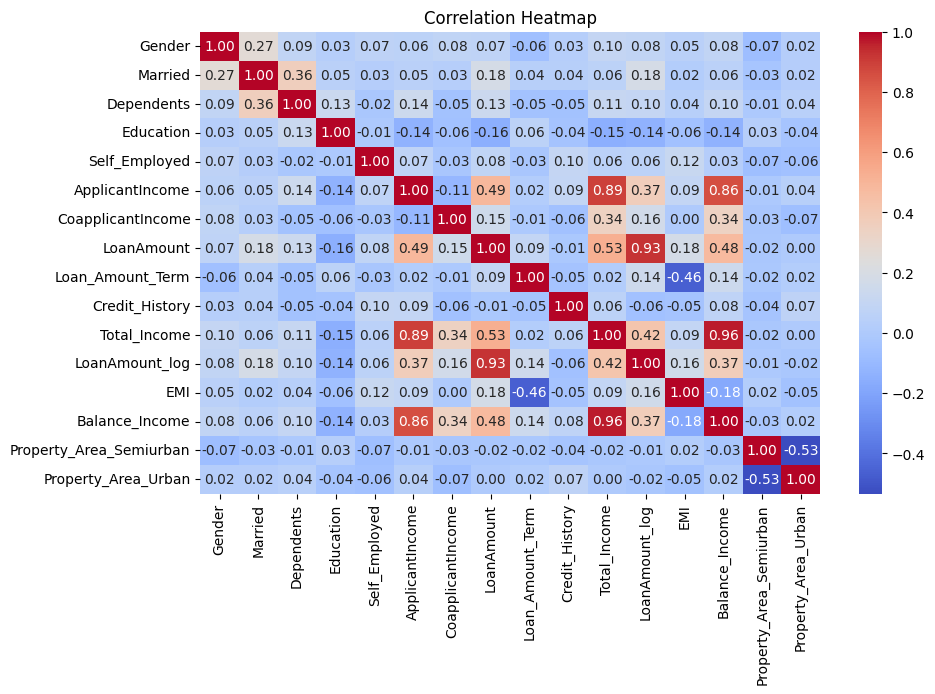

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Insights:
Total_Income will correlate strongly with ApplicantIncome and LoanAmount.
If you had a target like Loan_Status, you’d check which variables correlate most with it.

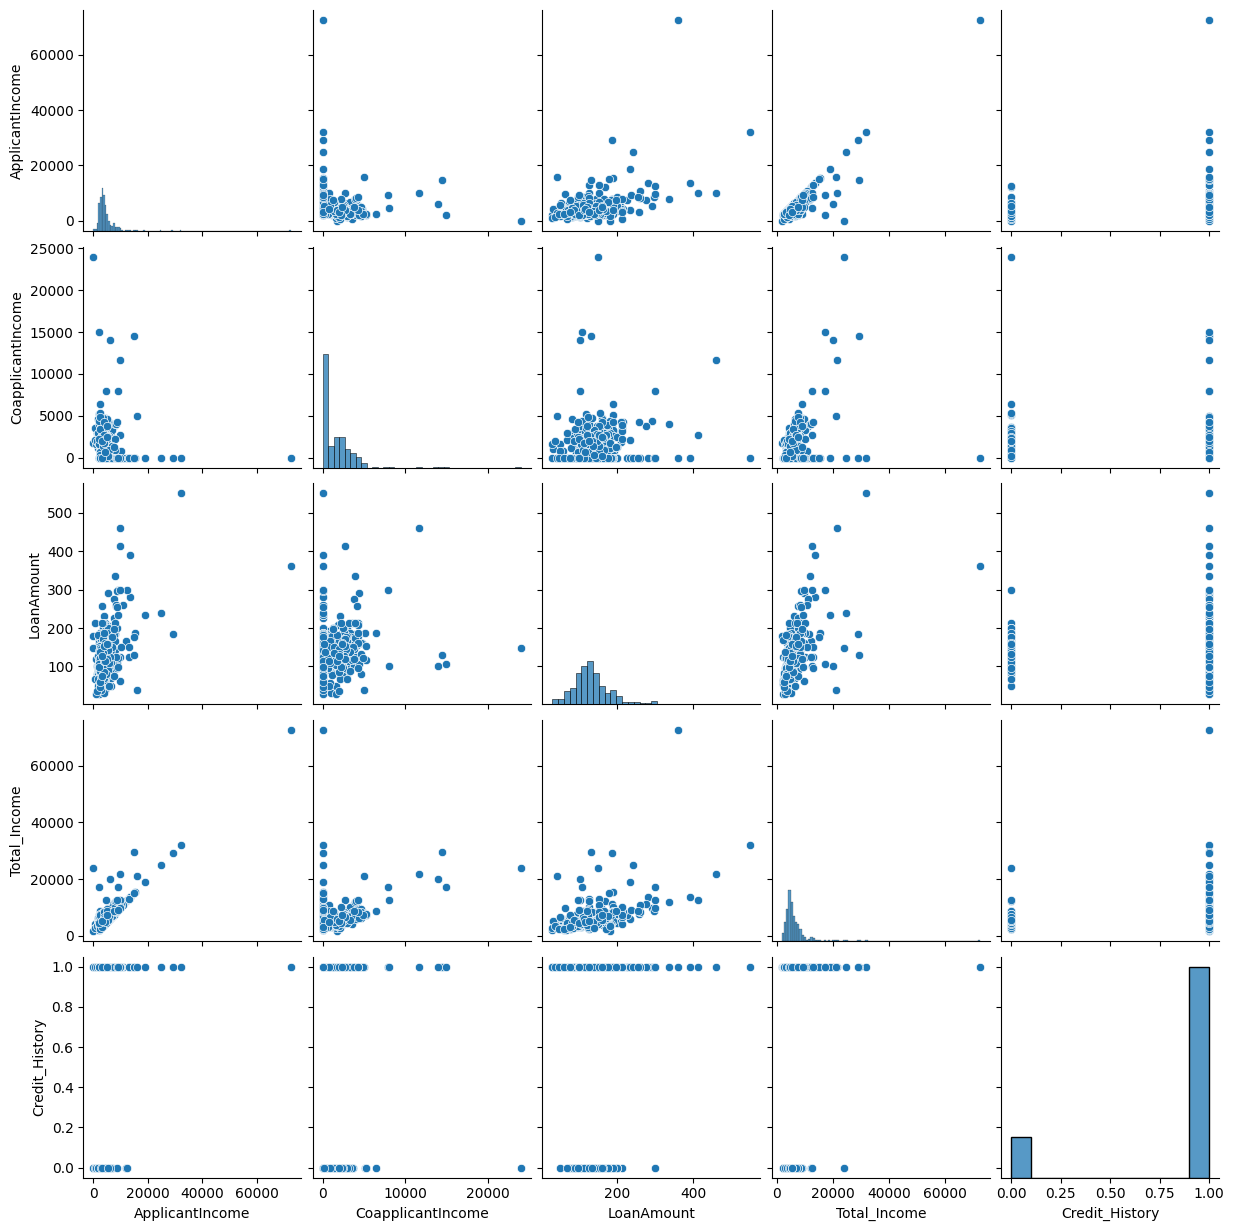

In [ ]:
#Pairplot of key numeric features
sns.pairplot(df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income', 'Credit_History']])
plt.show()

This shows relationships and trends across all numeric pairs